# Scrolling

This page focuses on describing tricks for implementing scrolling with tkinter. There are three elements in tkinter that support scrolling: `tkinter.Text`, `tkinter.Listbox`, `tkinter.ttk.Treeview`, `tkinter.ttk.Canvas`. And there is `tkinter.Scrollbar`, which implements a corresponding interface element to handle scrolling.

In [1]:
import os
from pathlib import Path

import numpy as np
import tkinter as tk

os.chdir(str(Path(os.getcwd()).parent))
from tkinter_files.screenshot import take_screenshot

## Binds

Binding to a scrolling event is a bit complicated. Because certain name of the event is system dependent.

The following example works on Linux - just use `<Button-4>` to scroll up and `<Button-5>` to scroll down. See this stack overflow step to see what to do on Mac or Windows. Here is a program that counts down and up scrolls and displays them on the labels.

In [9]:
root = tk.Tk()

up_scrolls_label = tk.Label(text="Up scrolls 0")
up_scrolls_label.pack()
down_scrolls_label = tk.Label(text="Down scrolls 0")
down_scrolls_label.pack()

up_counter = 0
down_counter = 0

def up_count(event):
    global up_counter
    up_scrolls_label.config(text=f"Up scrolls value {up_counter}")
    up_counter += 1

def down_count(event):
    global down_counter
    down_scrolls_label.config(text=f"Down Scrolls value {down_counter}")
    down_counter += 1

lb = tk.Listbox(root)
lb.pack()
lb.bind("<Button-4>", up_count)
lb.bind("<Button-5>", down_count)

for i in range(100):
    lb.insert(tk.END, "This is line number " + str(i))

root.mainloop()

## Attachment to the objects

When you add a scrollbar, you will probably want to use it to scroll something. So here we will discuss the options you need to add to be able to scroll items.

### `set` method

The `set` method allows you to set the position of the scroll bar. It takes two arguments, `start` and `stop`, both of which take values from 0 to 1. The following example shows a set of scrollbars with different `set` arguments.

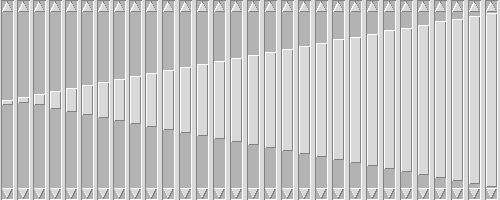

In [2]:
root = tk.Tk()
root.geometry("500x200")

for i in np.linspace(0,0.5,30):
    scrollbar = tk.Scrollbar(root)
    scrollbar.pack(expand=True, fill=tk.Y,side="left")
    scrollbar.set(0.5-i,0.5+i)

root.after(200, take_screenshot, root)
root.mainloop()

The mail purpose of this method is to be able to pass it as an `yscrollcommand` parameter to some other objects. So scrolling these elements will cause the scrollbar's traveller to move.

In the following example, the scrollbar was linked to the list box. The listbox was scrolled to `0.3` - and the traveller followed it. But the traveller's movements don't affect the listbox in any way.

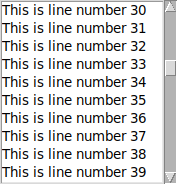

In [7]:
root = tk.Tk()
scrollbar = tk.Scrollbar(root)
scrollbar.pack(side = tk.RIGHT, fill=tk.Y)

mylist = tk.Listbox(root, yscrollcommand = scrollbar.set)
for line in range(100):
   mylist.insert(tk.END, "This is line number " + str(line))
mylist.yview_moveto(0.3)
mylist.pack()

root.after(200, take_screenshot, root)
root.mainloop()

### `command` attibute

You can set `command` using `scrollbar.config(command = <object>.yview)` so that moving the scrollbar with the mouse will cause the bound object to move.

To better understand how it works, let's set up a custom function as a `command`. It will wrap `yview` of some `Listbox` and additionally increment and display coutner every time it is called - so we can be sure that our function was called.

In [29]:
root = tk.Tk()

scrolls_number = 0
label = tk.Label(root, text=f"Number of scrolls - {scrolls_nubmer}")
label.pack()

scrollbar = tk.Scrollbar(root)
scrollbar.pack(side = tk.RIGHT, fill=tk.Y)

mylist = tk.Listbox(root, yscrollcommand = scrollbar.set)
for line in range(100):
   mylist.insert(tk.END, "This is line number " + str(line))
mylist.pack(side = tk.LEFT, fill = tk.BOTH )

def scrollbar_command(*args):
    
    mylist.yview(*args)

    global scrolls_number
    scrolls_number += 1
    label.config(text=f"Number of scrolls - {scrolls_number}")

#scrollbar.config(command = mylist.yview)
scrollbar.config(command = scrollbar_command)

root.mainloop()